# Exploratory Data Analysis

* Describing the data
* Datailing the main objectives of the analysis
* Variations of classifier models and specifies which one is the model that best suits the main objective(s) of this analysis
* Key findings related to the main objective(s) of the analysis?
* Highlight possible flaws in the model and a plan of action to revisit this analysis with additional data or different predictive modeling techniques

## 0. Imports

In [56]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.ensemble import ExtraTreesClassifier, RandomForestClassifier
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import f1_score

## 1. Load data

In [3]:
data_path = os.path.join('data', 'default_credit_card_clients.csv')
data_raw = pd.read_csv(data_path, skiprows=1)

In [4]:
data_raw.head()

,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
0,20000,2,2,1,24,2,2,-1,-1,-2,...,0,0,0,0,689,0,0,0,0,1
1,120000,2,2,2,26,-1,2,0,0,0,...,3272,3455,3261,0,1000,1000,1000,0,2000,1
2,90000,2,2,2,34,0,0,0,0,0,...,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
3,50000,2,2,1,37,0,0,0,0,0,...,28314,28959,29547,2000,2019,1200,1100,1069,1000,0
4,50000,1,2,1,57,-1,0,-1,0,0,...,20940,19146,19131,2000,36681,10000,9000,689,679,0


In [8]:
data_raw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 24 columns):
 #   Column                      Non-Null Count  Dtype
---  ------                      --------------  -----
 0   LIMIT_BAL                   30000 non-null  int64
 1   SEX                         30000 non-null  int64
 2   EDUCATION                   30000 non-null  int64
 3   MARRIAGE                    30000 non-null  int64
 4   AGE                         30000 non-null  int64
 5   PAY_0                       30000 non-null  int64
 6   PAY_2                       30000 non-null  int64
 7   PAY_3                       30000 non-null  int64
 8   PAY_4                       30000 non-null  int64
 9   PAY_5                       30000 non-null  int64
 10  PAY_6                       30000 non-null  int64
 11  BILL_AMT1                   30000 non-null  int64
 12  BILL_AMT2                   30000 non-null  int64
 13  BILL_AMT3                   30000 non-null  int64
 14  BILL_A

## 2. Previous Exploratory Analysis

In [7]:
data_raw.describe().T

,count,mean,std,min,25%,50%,75%,max
LIMIT_BAL,30000.0,167484.322667,129747.661567,10000.0,50000.00,140000.0,240000.00,1000000.0
SEX,30000.0,1.603733,0.489129,1.0,1.00,2.0,2.00,2.0
EDUCATION,30000.0,1.853133,0.790349,0.0,1.00,2.0,2.00,6.0
MARRIAGE,30000.0,1.551867,0.521970,0.0,1.00,2.0,2.00,3.0
AGE,30000.0,35.485500,9.217904,21.0,28.00,34.0,41.00,79.0
PAY_0,30000.0,-0.016700,1.123802,-2.0,-1.00,0.0,0.00,8.0
PAY_2,30000.0,-0.133767,1.197186,-2.0,-1.00,0.0,0.00,8.0
PAY_3,30000.0,-0.166200,1.196868,-2.0,-1.00,0.0,0.00,8.0
PAY_4,30000.0,-0.220667,1.169139,-2.0,-1.00,0.0,0.00,8.0
PAY_5,30000.0,-0.266200,1.133187,-2.0,-1.00,0.0,0.00,8.0


Depending on the model, the data should be scaled.

In [10]:
target = data_raw['default payment next month'].value_counts()

print(f"Default payment next month?\nNo: {target[0]}\nYes: {target[1]}")

Default payment next month?
No: 23364
Yes: 6636


It's a unbalanced dataset.

## 3. Load Train sets

In [11]:
X_train = pd.read_parquet('data/x_train.parquet')
y_train = pd.read_parquet('data/y_train.parquet')

In [12]:
X_train.head()

,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,...,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6
11018,160000,2,2,2,32,0,0,0,0,0,...,155404,153234,156731,155818,6000,6000,5600,6000,6000,5500
1710,100000,2,1,2,30,0,0,0,0,2,...,42283,51539,50583,52588,5000,10000,10000,0,2846,1936
4618,80000,1,1,2,29,0,0,0,0,0,...,64277,45455,42231,42804,3300,2500,1556,1600,1600,1600
5482,20000,2,2,1,27,0,0,-1,-1,-2,...,780,0,0,0,1006,780,0,0,0,0
26187,50000,2,1,2,30,-2,-2,-2,-2,-2,...,0,0,0,0,2070,0,0,0,0,0


In [13]:
y_train.head()

,default payment next month
11018,0
1710,1
4618,0
5482,0
26187,0


In [18]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 21000 entries, 11018 to 27126
Data columns (total 23 columns):
 #   Column     Non-Null Count  Dtype
---  ------     --------------  -----
 0   LIMIT_BAL  21000 non-null  int64
 1   SEX        21000 non-null  int64
 2   EDUCATION  21000 non-null  int64
 3   MARRIAGE   21000 non-null  int64
 4   AGE        21000 non-null  int64
 5   PAY_0      21000 non-null  int64
 6   PAY_2      21000 non-null  int64
 7   PAY_3      21000 non-null  int64
 8   PAY_4      21000 non-null  int64
 9   PAY_5      21000 non-null  int64
 10  PAY_6      21000 non-null  int64
 11  BILL_AMT1  21000 non-null  int64
 12  BILL_AMT2  21000 non-null  int64
 13  BILL_AMT3  21000 non-null  int64
 14  BILL_AMT4  21000 non-null  int64
 15  BILL_AMT5  21000 non-null  int64
 16  BILL_AMT6  21000 non-null  int64
 17  PAY_AMT1   21000 non-null  int64
 18  PAY_AMT2   21000 non-null  int64
 19  PAY_AMT3   21000 non-null  int64
 20  PAY_AMT4   21000 non-null  int64
 21  PAY_AMT5

In [19]:
y_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 21000 entries, 11018 to 27126
Data columns (total 1 columns):
 #   Column                      Non-Null Count  Dtype
---  ------                      --------------  -----
 0   default payment next month  21000 non-null  int64
dtypes: int64(1)
memory usage: 844.2 KB


## 4. Exploratory Data Analysis

array([[<AxesSubplot:title={'center':'LIMIT_BAL'}>,
        <AxesSubplot:title={'center':'SEX'}>,
        <AxesSubplot:title={'center':'EDUCATION'}>,
        <AxesSubplot:title={'center':'MARRIAGE'}>,
        <AxesSubplot:title={'center':'AGE'}>],
       [<AxesSubplot:title={'center':'PAY_0'}>,
        <AxesSubplot:title={'center':'PAY_2'}>,
        <AxesSubplot:title={'center':'PAY_3'}>,
        <AxesSubplot:title={'center':'PAY_4'}>,
        <AxesSubplot:title={'center':'PAY_5'}>],
       [<AxesSubplot:title={'center':'PAY_6'}>,
        <AxesSubplot:title={'center':'BILL_AMT1'}>,
        <AxesSubplot:title={'center':'BILL_AMT2'}>,
        <AxesSubplot:title={'center':'BILL_AMT3'}>,
        <AxesSubplot:title={'center':'BILL_AMT4'}>],
       [<AxesSubplot:title={'center':'BILL_AMT5'}>,
        <AxesSubplot:title={'center':'BILL_AMT6'}>,
        <AxesSubplot:title={'center':'PAY_AMT1'}>,
        <AxesSubplot:title={'center':'PAY_AMT2'}>,
        <AxesSubplot:title={'center':'PAY_AMT3'}

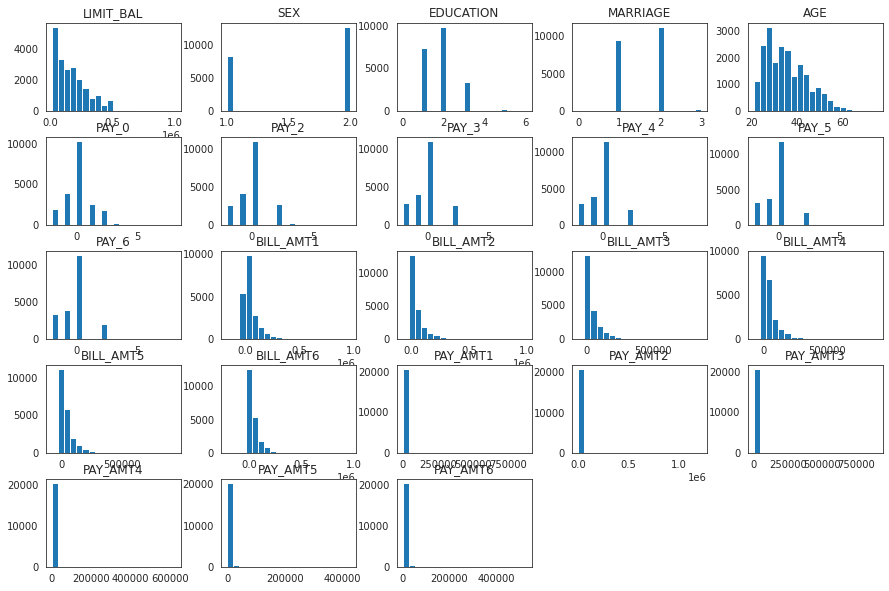

In [14]:
sns.set_style(style='white')
X_train.hist(figsize=(15, 10), bins=20, grid=False)

In [16]:
X_train.skew()

LIMIT_BAL     0.999384
SEX          -0.423501
EDUCATION     0.994205
MARRIAGE     -0.027035
AGE           0.733548
PAY_0         0.728328
PAY_2         0.803700
PAY_3         0.808713
PAY_4         0.905861
PAY_5         0.906568
PAY_6         0.864933
BILL_AMT1     2.665551
BILL_AMT2     2.733801
BILL_AMT3     2.738895
BILL_AMT4     2.831088
BILL_AMT5     2.930481
BILL_AMT6     2.898127
PAY_AMT1     15.829797
PAY_AMT2     21.766774
PAY_AMT3     19.104434
PAY_AMT4     12.485983
PAY_AMT5     10.925696
PAY_AMT6     10.054438
dtype: float64

In [20]:
train = X_train.merge(y_train, left_index=True, right_index=True)

In [25]:
corr = train.corr()
corr.iloc[:, -1]

LIMIT_BAL                    -0.159213
SEX                          -0.042592
EDUCATION                     0.024080
MARRIAGE                     -0.018953
AGE                           0.007442
PAY_0                         0.327370
PAY_2                         0.267821
PAY_3                         0.240649
PAY_4                         0.223032
PAY_5                         0.208392
PAY_6                         0.193506
BILL_AMT1                    -0.024878
BILL_AMT2                    -0.019810
BILL_AMT3                    -0.019245
BILL_AMT4                    -0.014071
BILL_AMT5                    -0.009466
BILL_AMT6                    -0.006929
PAY_AMT1                     -0.070114
PAY_AMT2                     -0.066631
PAY_AMT3                     -0.052702
PAY_AMT4                     -0.055853
PAY_AMT5                     -0.052220
PAY_AMT6                     -0.055074
default payment next month    1.000000
Name: default payment next month, dtype: float64

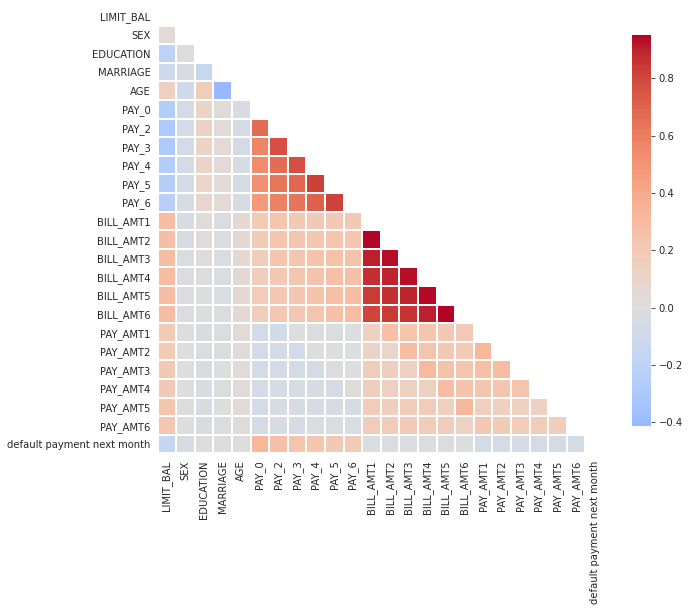

In [29]:
# Generate a mask for the upper triangle
mask = np.triu(np.ones_like(corr, dtype=bool))

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(10, 12))

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=plt.get_cmap('coolwarm'), center=0,
            square=True, linewidths=.3, cbar_kws={"shrink": .6})
plt.show()

In [34]:
rndf_clf = RandomForestClassifier(random_state=42, n_jobs=-1)
extt_clf = ExtraTreesClassifier(random_state=42, n_jobs=-1)

In [66]:
params = {
    'n_estimators': [200, 300, 400, 500],
    'max_features': ['auto', 'sqrt', 'log2', None],
    'max_leaf_nodes': [10, 15, None]
}

In [67]:
estimators = {}
for estimator in [rndf_clf, extt_clf]:
    estimators[estimator.__class__.__name__] = RandomizedSearchCV(estimator=estimator, param_distributions=params, 
                                                                 n_jobs=-1, n_iter=15, cv=5, return_train_score=True,
                                                                random_state=42, scoring='f1').fit(X_train, np.ravel(y_train))
    

In [52]:
estimators.keys()

dict_keys(['RandomForestClassifier', 'ExtraTreesClassifier'])

In [68]:
for estimator in estimators.keys():
    print(f"{estimator} --- {estimators[estimator].best_score_}")

RandomForestClassifier --- 0.4779273983209421
ExtraTreesClassifier --- 0.4859092106917867


In [61]:
f1_score(np.ravel(y_train), np.ones(21_000))

0.36225385065314875

In [69]:
for estimator in estimators.keys():
    print(f"{estimator} --- {estimators[estimator].best_params_}")

RandomForestClassifier --- {'n_estimators': 300, 'max_leaf_nodes': None, 'max_features': 'log2'}
ExtraTreesClassifier --- {'n_estimators': 200, 'max_leaf_nodes': 15, 'max_features': None}
